## Landmark and Historical Building Data Cleaning

Cleaning for the dataset on Manhattan hisotrical buildings and landmarks

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


#Read data frame from csv file
df = pd.read_csv('archive/Historic_Building_DB_20180401_Release.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

#Read size from csv
df.shape

(37459, 39)

In [22]:
#Basic information on dataframe and feature types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37459 entries, 0 to 37458
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   the_geom    37459 non-null  object 
 1   BIN         37459 non-null  int64  
 2   BBL         37459 non-null  int64  
 3   Borough     37459 non-null  object 
 4   Block       37459 non-null  int64  
 5   Lot         37459 non-null  int64  
 6   Des_Addres  37459 non-null  object 
 7   Circa       37459 non-null  int64  
 8   Date_Low    37459 non-null  int64  
 9   Date_High   37459 non-null  int64  
 10  Date_Combo  37459 non-null  object 
 11  Alt_Date_1  37459 non-null  object 
 12  Alt_Date_2  37459 non-null  object 
 13  Arch_Build  37459 non-null  object 
 14  Own_Devel   37459 non-null  object 
 15  Alt_Arch_1  37459 non-null  object 
 16  Alt_Arch_2  37459 non-null  object 
 17  Altered     37459 non-null  int64  
 18  Style_Prim  37458 non-null  object 
 19  Style_Sec   37459 non-nul

In [23]:
#Checking for duplicate rows

df.duplicated().sum()

#14 duplicate values pre-cleaning.

14

In [24]:
#Removing unnecessary columns, keeping architecctural data and location data as those are the only data points needed for mapping

df = df[['Borough', 'Block', 'Lot', 'Des_Addres', 'Date_Low', 'Date_High', 'Alt_Date_1', 'Alt_Date_2', 'Style_Prim', 'Style_Oth', 'LM_Orig', 'LM_New']]

In [25]:
#changing block, lot, and dates to categorical, as they are not continuous values

df['Block'] = df['Block'].astype(object)
df['Lot'] = df['Lot'].astype(object)
df['Date_Low'] = df['Date_Low'].astype(object)
df['Date_High'] = df['Date_High'].astype(object)

In [26]:
#First and last 5 rows to check data formatting

print("First 5 rows:")
print(df.head())
print("Last 5 rows:\n")
print(df.tail())

First 5 rows:
  Borough Block  Lot                                         Des_Addres  \
0      BK  6692   18                               803 East 17th Street   
1      BK  6692   74  814 East 18th Street (aka 812-814 East 18th St...   
2      BK  5237  230                                 1653 Glenwood Road   
3      BK  6691   32                                54 Wellington Court   
4      BK  6693    7                                      1809 Avenue H   

  Date_Low Date_High Alt_Date_1 Alt_Date_2                         Style_Prim  \
0     1912      1912       1958          0                     Not determined   
1        0         0          0          0                     Not determined   
2     1906      1906          0          0                   Colonial Revival   
3     1911      1911          0          0                      Arts & Crafts   
4     1906      1906          0          0  Colonial Revival with alterations   

  Style_Oth LM_Orig LM_New  
0         0       0

In [27]:
#Re-checking for duplicate values

df.duplicated().sum()

#898 duplicate values post-cleaning. This is likely due to the dropped columns. These will be removed, as they represent a minority of the dataset, and provide no new information on a particular address

898

In [28]:
#Removing non-Manhattan data, as this project focuses only on Manhattan

df = df[df.Borough == 'MN']
df.shape

(14578, 12)

In [29]:
#All features are categorical

categorical = list(df)

In [30]:
#Checking for missing values

for item in categorical:
    percent_missing = df[item].isnull().sum() * 100 / len(df)
    print(percent_missing)

#Miniscule amount of missing data in style_prim. Statistically negligible

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.006859651529702291
0.0
0.0
0.0


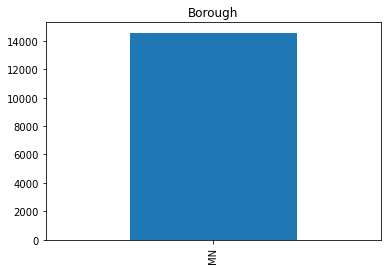

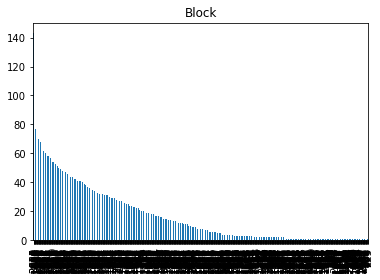

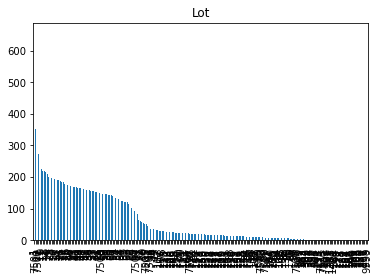

C:\Users\mattx\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mattx\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


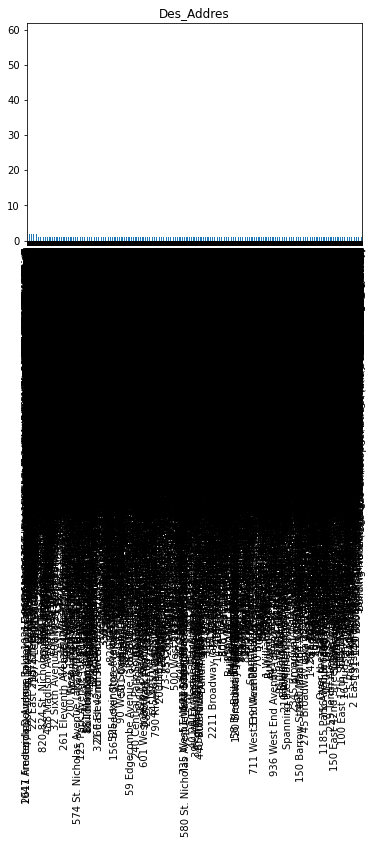

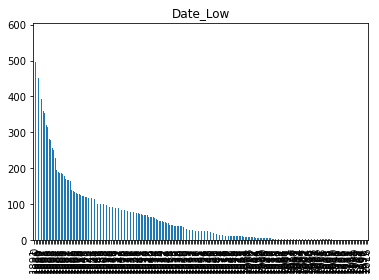

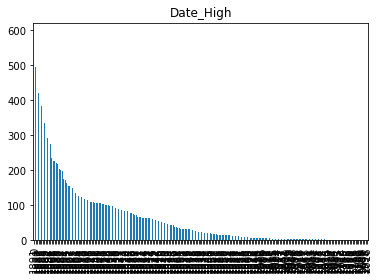

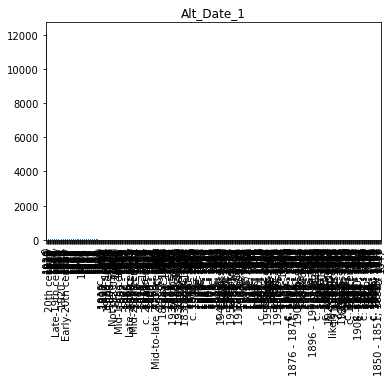

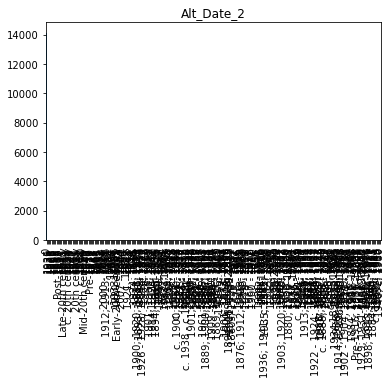

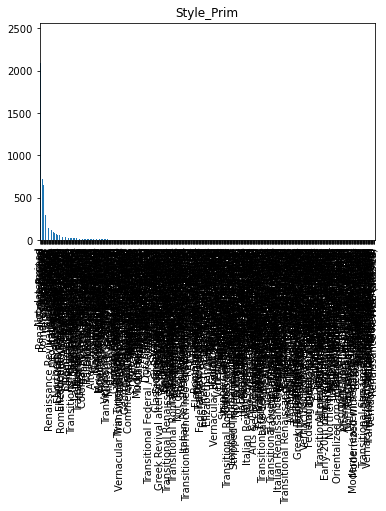

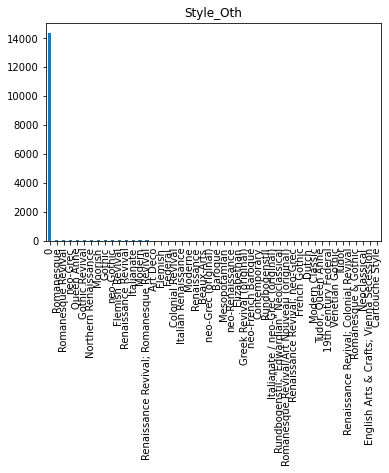

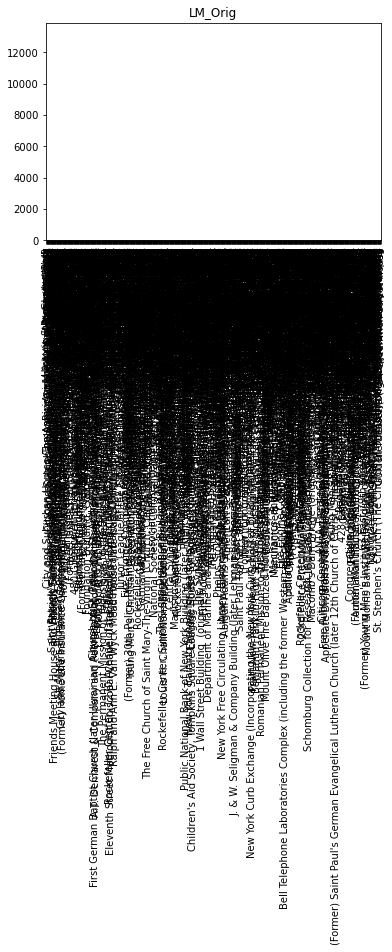

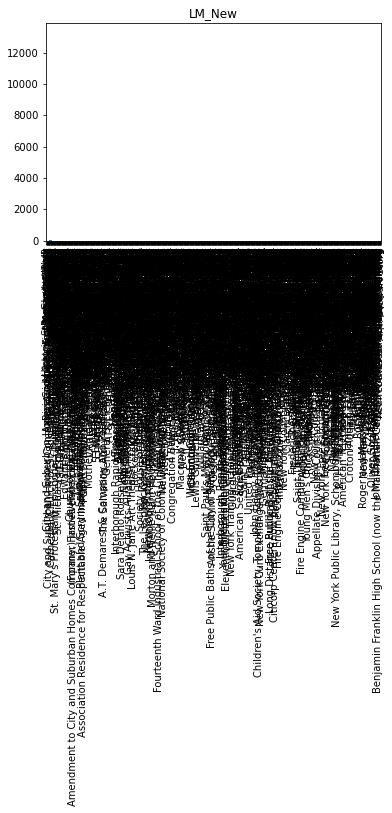

In [31]:
#Plot bar plots for categorical features

for item in categorical:
    df[item].value_counts(dropna=False).plot(kind='bar', title=item)
    plt.show()